In [38]:
import os
import json
from matplotlib import pyplot as plt
import pandas as pd

In [53]:
PATH = 'data'
here = os.getcwd().replace('\\','/')
target_folder = '/'.join((here,PATH))
for agent in os.listdir(target_folder):
    agent_name = agent
    print(agent_name)
    new_target_folder = '/'.join((target_folder, agent))
    df = pd.DataFrame()
    for scenario in os.listdir(new_target_folder):
        if scenario.endswith('.pt'): continue
        final_target_folder = '/'.join((new_target_folder,scenario))
        files = [file for file in sorted(os.listdir(final_target_folder))]
        #print(files)
        scores = []
        for file in files:
            file_path = '/'.join((final_target_folder,file))
            #print(file_path)
            with open(file_path)as f:
                data = json.load(f)
            #print(data)
            agents = data['by_agent']
            try:
                agent = agents['qtable_agent']
            except:
                pass
            try:
                agent = agents['sarsa_agent']
            except:
                pass
            try:
                agent = agents['n_step_sarsa_agent']
            except:
                pass
            score = agent['score']/agent['rounds']
            scores.append(score)
        
        df[scenario] = scores
        

    
    df.to_pickle('/'.join((here,'dataframes',agent_name+'.pkl')))

sarsa
['2023-10-01 12-41-26.json', '2023-10-01 12-41-51.json', '2023-10-01 12-42-15.json', '2023-10-01 12-42-43.json', '2023-10-01 12-43-08.json', '2023-10-01 12-43-36.json', '2023-10-01 12-44-05.json', '2023-10-01 12-44-35.json', '2023-10-01 12-45-03.json', '2023-10-01 12-45-31.json', '2023-10-01 12-46-01.json', '2023-10-01 12-46-28.json', '2023-10-01 12-46-57.json', '2023-10-01 12-47-27.json', '2023-10-01 12-47-57.json', '2023-10-01 12-48-28.json', '2023-10-01 12-48-57.json', '2023-10-01 12-49-29.json', '2023-10-01 12-49-59.json', '2023-10-01 12-50-27.json', '2023-10-01 12-50-56.json', '2023-10-01 12-51-23.json', '2023-10-01 12-51-53.json', '2023-10-01 12-52-25.json', '2023-10-01 12-52-57.json', '2023-10-01 12-53-29.json', '2023-10-01 12-54-00.json', '2023-10-01 12-54-31.json', '2023-10-01 12-55-02.json', '2023-10-01 12-55-32.json', '2023-10-01 12-56-01.json', '2023-10-01 12-56-29.json', '2023-10-01 12-56-56.json', '2023-10-01 12-57-21.json', '2023-10-01 12-57-48.json', '2023-10-01 1

In [34]:
df.columns

Index(['coin5_peaceful', 'coin5', 'empty', 'classic', 'crates'], dtype='object')

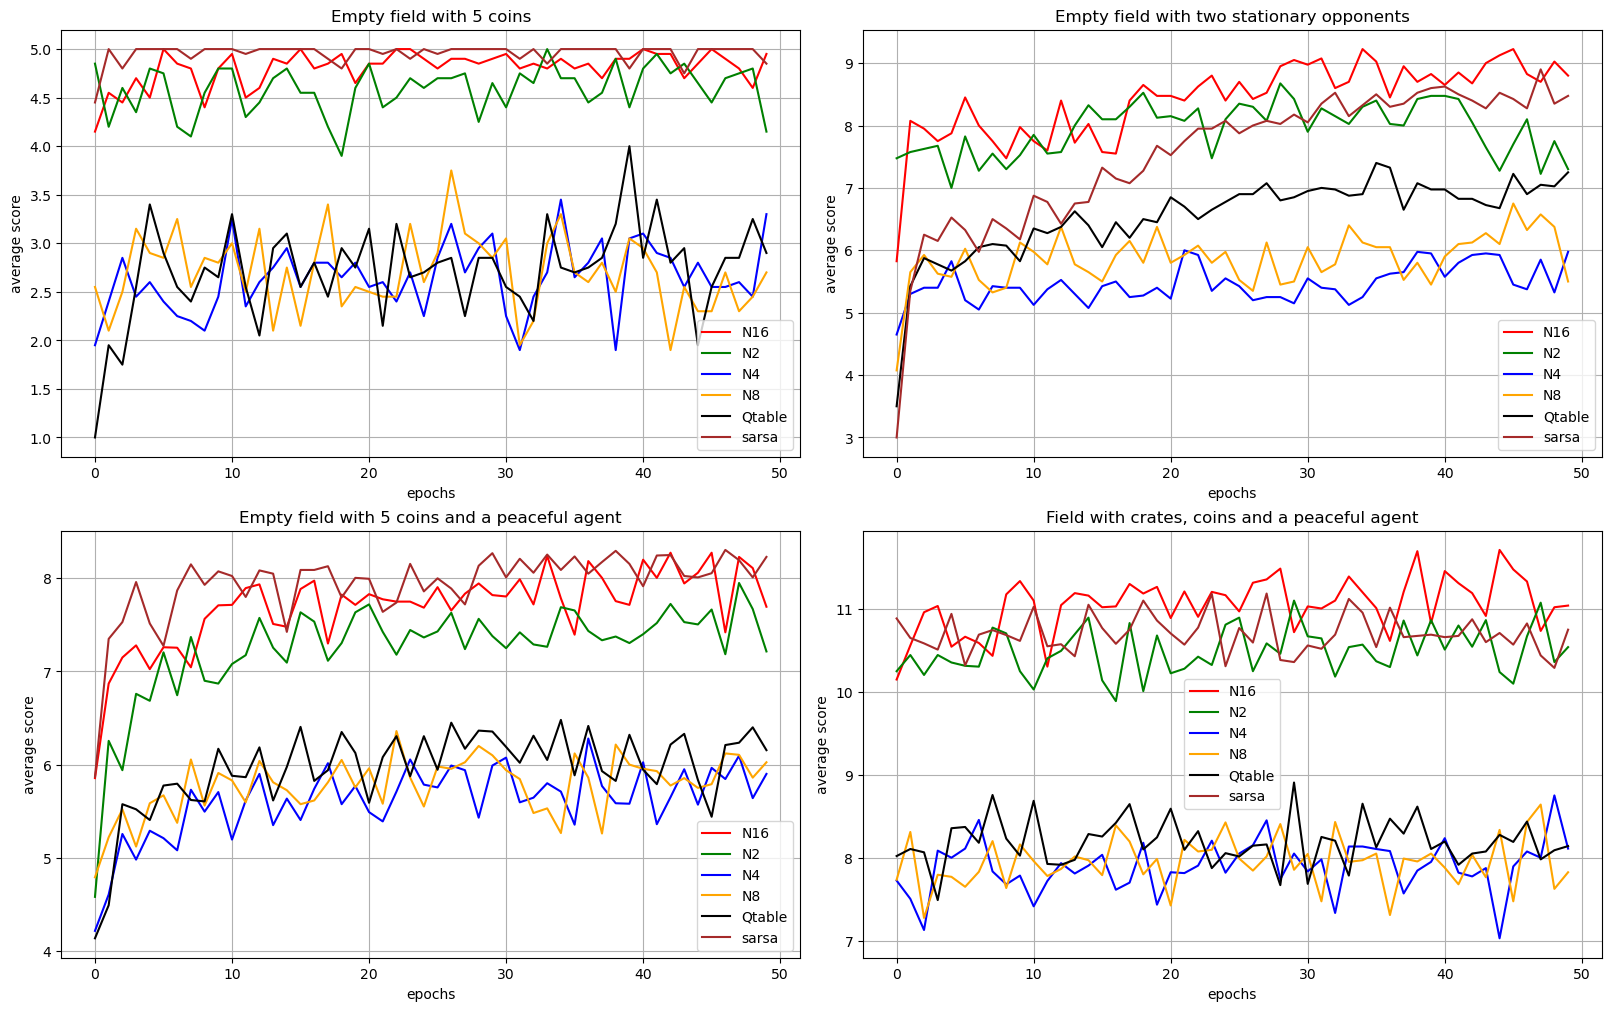

In [63]:
from matplotlib import pyplot as plt
PATH = 'dataframes'
here = os.getcwd().replace('\\','/')
target_folder = '/'.join((here,PATH))
sorting = ['coin5', 'empty', 'coin5_peaceful', 'crates']
titles = ["Empty field with 5 coins", "Empty field with two stationary opponents", "Empty field with 5 coins and a peaceful agent", "Field with crates, coins and a peaceful agent"]
colors = ['red', 'green', 'blue', 'orange', 'black', 'brown']
fig, axs = plt.subplots(2,2, figsize=(16, 10), layout="constrained")
axs = axs.flatten()

files = sorted(os.listdir(target_folder))

for file,c  in zip(files,colors):
    agent_name = file.split('.pkl')[0]
    df = pd.read_pickle('/'.join((target_folder, file)))
    for scenario, ax, title in zip(sorting, axs, titles):
        scores = df[scenario]
        ax.plot(scores, label=agent_name, color=c)
        ax.set_xlabel('epochs')
        ax.set_ylabel('average score')

        ax.set_title(title)
        ax.grid('both')
        ax.legend()

    #print(agent_name)
    #print(df)
    #break

plt.savefig('/'.join((here,'plots','multiple.png')),bbox_inches='tight')

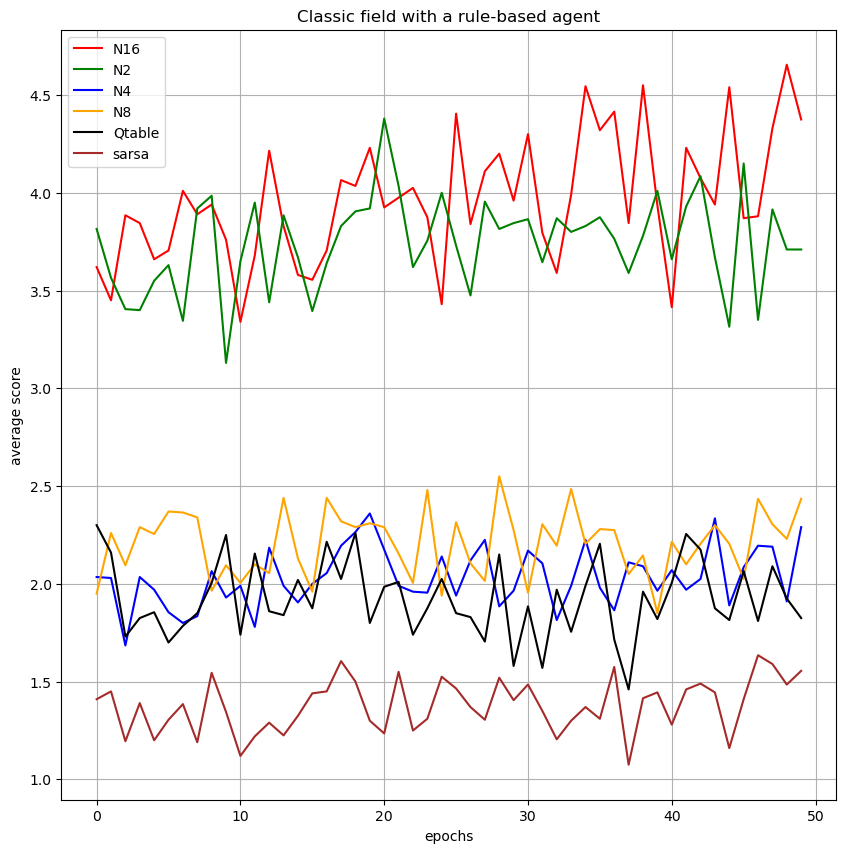

In [62]:
plt.figure(figsize=(10,10))
for file, c in zip(files,colors):
    agent_name = file.split('.pkl')[0]
    df = pd.read_pickle('/'.join((target_folder, file)))
    scores = df['classic']
    plt.plot(scores, label=agent_name, color=c)
plt.title('Classic field with a rule-based agent')
plt.xlabel('epochs')
plt.ylabel('average score')
plt.grid('both')
plt.legend()
plt.savefig('/'.join((here,'plots','classic.png')),bbox_inches='tight')
plt.show()

In [ ]:
PATH = 'data'
here = os.getcwd().replace('\\','/')
target_folder = '/'.join((here,PATH))
files = [file for file in os.listdir(target_folder) if file.endswith('.json')]
plot_keys = ['bombs', 'coins', 'crates', 'invalid', 'kills', 'score', 'suicides', 'time']
scores = []
for file in files:
    #print(file)
    file_path = '/'.join((target_folder,file))
    with open(file_path)as f:
        data = json.load(f)
    #print(data)
    agents = data['by_agent']
    agent = agents['qtable_agent']
    score = agent['score']/agent['rounds']
    scores.append(score)

print(scores)
plt.plot(scores)